In [2]:
import pandas as pd
df = pd.read_csv('bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [4]:
num_of_books = len(df['name'].unique())
print(num_of_books)

351


Про скільки книг зберігає дані датасет? Відповідь: 351

In [5]:
missing_percentage_per_column = (df.isna().sum() / len(df)) * 100

print("Частка пропусків в кожній колонці, %:")
print(missing_percentage_per_column)

Частка пропусків в кожній колонці, %:
name           0.0
author         0.0
user_rating    0.0
reviews        0.0
price          0.0
year           0.0
genre          0.0
dtype: float64


Чи є в якихось змінних пропуски? Ні

In [6]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри? Non Fiction, Fiction

<Axes: ylabel='Frequency'>

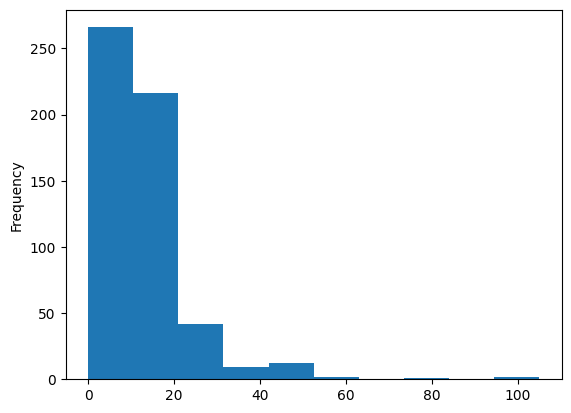

In [7]:
df['price'].plot(kind='hist')

In [8]:
print(df['price'].max())
print(df['price'].min())
print(df['price'].mean())
print(df['price'].median())

105
0
13.1
11.0


Максимальна ціна? 105$
Мінімальна ціна? 0$
Середня ціна? 13.1$
Медіанна ціна? 11.0$

In [9]:
df['user_rating'].max()

4.9

Який рейтинг у датасеті найвищий? Відповідь: 4.9

In [10]:
print(sum(df['user_rating'] == df['user_rating'].max()))

52


Скільки книг мають такий рейтинг? Відповідь: 52

In [11]:
max_reviews_index = df['reviews'].idxmax()
book_with_max_reviews = df.loc[max_reviews_index, 'name']
print(book_with_max_reviews)

Where the Crawdads Sing


Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing

In [12]:
most_exp_book_2015 = df[df['year'] == 2015].sort_values(by='price', ascending=False).iloc[0]
print(most_exp_book_2015['name'])
print(most_exp_book_2015['price'])


Publication Manual of the American Psychological Association, 6th Edition
46


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychological Association, 6th Edition, її ціна 46$

In [13]:
fiction_books_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]
num_fiction_books_2010 = len(fiction_books_2010)
print(num_fiction_books_2010)


20


 Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

In [14]:
df[(df['user_rating'] == 4.9) & df['year'].isin([2010, 2011])]


,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


In [15]:
print(len(df[(df['user_rating'] == 4.9) & df['year'].isin([2010, 2011])]))

1


Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

In [16]:
books_2015_under_8_dollars = df[(df['year'] == 2015) & (df['price'] < 8)]
sorted_books = books_2015_under_8_dollars.sort_values(by='price', ascending=True)
print(sorted_books.iloc[-1]['name'])

Old School (Diary of a Wimpy Kid #10)


Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10) 

In [17]:
genre_price_stats = df.groupby('genre')['price'].agg(['min', 'max'])

print('Maximum and minimum prices for each genre:')
print(genre_price_stats)

Maximum and minimum prices for each genre:
             min  max
genre                
Fiction        0   82
Non Fiction    0  105


Максимальна ціна для жанру Fiction: Відповідь: 82$

 Мінімальна ціна для жанру Fiction: Відповідь: 0$

Максимальна ціна для жанру Non Fiction: Відповідь: 105$

Мінімальна ціна для жанру Non Fiction: Відповідь: 0$

In [18]:
authors_books_count = df.groupby('author').agg({'name': 'count'})
print(authors_books_count)

                            name
author                          
Abraham Verghese               2
Adam Gasiewski                 1
Adam Mansbach                  1
Adir Levy                      1
Admiral William H. McRaven     1
...                          ...
Walter Isaacson                3
William Davis                  2
William P. Young               2
Wizards RPG Team               3
Zhi Gang Sha                   2

[248 rows x 1 columns]


In [19]:
authors_books_count.shape

(248, 1)

Якої розмірності вийшла таблиця? Відповідь: 248 рядків на 1 стовпчик

In [20]:
sorted_authors = authors_books_count.sort_values(by='name', ascending=False)
author_with_most_books = sorted_authors.iloc[0]
print(author_with_most_books)

name    12
Name: Jeff Kinney, dtype: int64


Який автор має найбільше книг? Відповідь: Jeff Kinney

Скільки книг цього автора? Відповідь: 12

In [21]:
authors_avg_rating = df.groupby('author').agg({'user_rating': 'mean'})
print(authors_avg_rating)

                            user_rating
author                                 
Abraham Verghese               4.600000
Adam Gasiewski                 4.400000
Adam Mansbach                  4.800000
Adir Levy                      4.800000
Admiral William H. McRaven     4.700000
...                                 ...
Walter Isaacson                4.566667
William Davis                  4.400000
William P. Young               4.600000
Wizards RPG Team               4.800000
Zhi Gang Sha                   4.600000

[248 rows x 1 columns]


In [22]:
lowest_rating_author = authors_avg_rating.sort_values(by='user_rating', ascending=False).iloc[-1]
print(lowest_rating_author)

user_rating    3.9
Name: Donna Tartt, dtype: float64


У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt

Який у цього автора середній рейтинг? Відповідь: 3.9

In [23]:
df_authors = pd.concat([authors_books_count, authors_avg_rating], axis=1)
df_authors.columns = ['num_books', 'avg_rating']
print(df_authors)

                            num_books  avg_rating
author                                           
Abraham Verghese                    2    4.600000
Adam Gasiewski                      1    4.400000
Adam Mansbach                       1    4.800000
Adir Levy                           1    4.800000
Admiral William H. McRaven          1    4.700000
...                               ...         ...
Walter Isaacson                     3    4.566667
William Davis                       2    4.400000
William P. Young                    2    4.600000
Wizards RPG Team                    3    4.800000
Zhi Gang Sha                        2    4.600000

[248 rows x 2 columns]


In [24]:
df_authors.sort_values(['num_books', 'avg_rating'])

,num_books,avg_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


Який автор перший у списку? Muriel Barbery

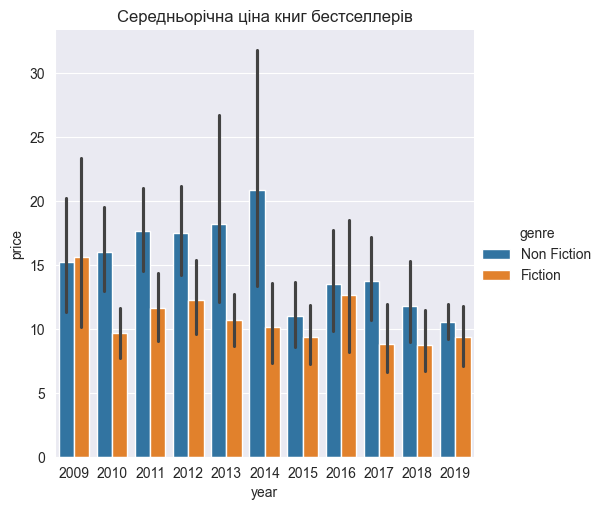

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.catplot(x='year', y='price', hue='genre', kind="bar", data=df)
plt.title('Середньорічна ціна книг-бестселлерів')
plt.show()



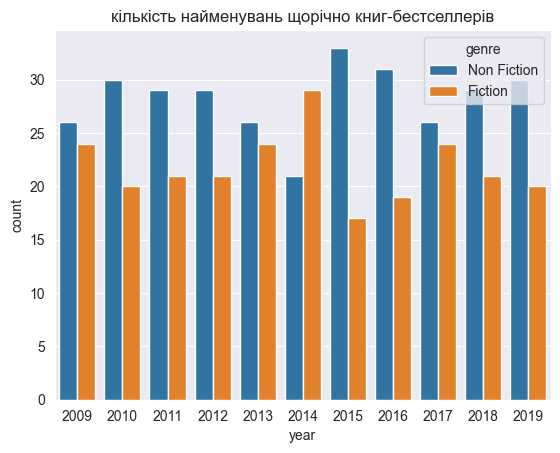

In [69]:
sns.countplot(x='year', hue='genre', data=df)
plt.title('кількість найменувань щорічно книг-бестселлерів')
plt.show()

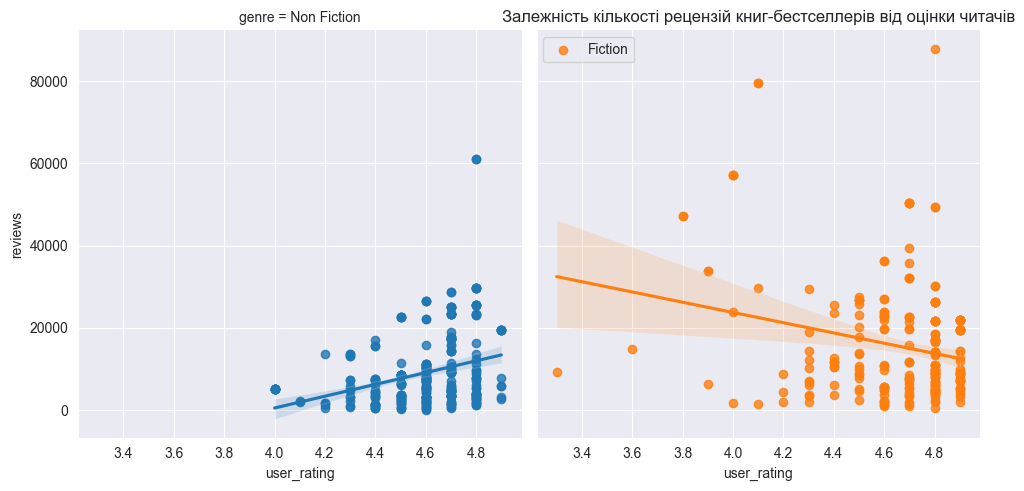

In [78]:
sns.lmplot(y='reviews', x='user_rating', hue='genre', col='genre', data=df)
plt.title('Залежність кількості рецензій книг-бестселлерів від оцінки читачів')
plt.legend()
plt.show()